## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('digital_addiction_risk.csv')

### Columns and Rows

In [4]:
data.shape

(20000, 9)

In [5]:
data.head()

,Age,Screen_Time_Hours,Social_Media_Hours,Sleep_Hours,Study_Work_Hours,Physical_Activity_Min,App_Unlocks_Per_Day,Mood_Score,Addiction_Risk
0,21,4.452074,3.298626,6.395866,5.401343,121,200,3,Low
1,34,8.434306,9.872822,4.582005,8.078400,158,133,4,Medium
2,43,12.625938,0.704951,5.237434,11.413507,13,135,7,Medium
3,29,7.177570,6.892476,6.891897,4.141653,150,67,2,Medium
4,25,13.286528,6.280880,7.208278,10.572990,37,157,3,High


In [6]:
data.tail()

,Age,Screen_Time_Hours,Social_Media_Hours,Sleep_Hours,Study_Work_Hours,Physical_Activity_Min,App_Unlocks_Per_Day,Mood_Score,Addiction_Risk
19995,23,8.159135,7.791587,7.513416,9.718215,0,70,3,Medium
19996,36,12.681853,3.605841,8.998988,5.367456,154,213,3,Medium
19997,41,12.451396,1.115530,8.183250,3.956230,158,121,7,Medium
19998,23,2.962412,7.339873,4.266460,7.960971,118,41,10,Low
19999,18,2.061907,9.901213,8.768334,6.647786,105,162,5,Medium


## Perform EDA

### Check Null Values

In [8]:
data.isnull().sum()

Age                        0
Screen_Time_Hours        797
Social_Media_Hours       800
Sleep_Hours              798
Study_Work_Hours           0
Physical_Activity_Min      0
App_Unlocks_Per_Day        0
Mood_Score                 0
Addiction_Risk             1
dtype: int64

### Handle Null Values

In [9]:
data['Screen_Time_Hours'] = data['Screen_Time_Hours'].fillna(data['Screen_Time_Hours'].mean())

In [10]:
data['Social_Media_Hours'] = data['Social_Media_Hours'].fillna(data['Social_Media_Hours'].mean())

In [11]:
data['Sleep_Hours'] = data['Sleep_Hours'].fillna(data['Sleep_Hours'].mean())

In [12]:
data = data.dropna(subset=['Addiction_Risk'])

In [13]:
data.isnull().sum()

Age                      0
Screen_Time_Hours        0
Social_Media_Hours       0
Sleep_Hours              0
Study_Work_Hours         0
Physical_Activity_Min    0
App_Unlocks_Per_Day      0
Mood_Score               0
Addiction_Risk           0
dtype: int64

### Check Outliers

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def checkOutliers(data, col):
    plt.figure(figsize=(12,4))
    
    # Boxplot
    plt.subplot(1,2,1)
    plt.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    
    # Histogram 
    plt.subplot(1,2,2)
    sns.histplot(data=data, x=col, kde=True)
    
    mean = data[col].mean()
    std = data[col].std()
    
    plt.axvline(mean + 3*std, color='red')
    plt.axvline(mean - 3*std, color='red')
    
    plt.tight_layout()
    plt.show()

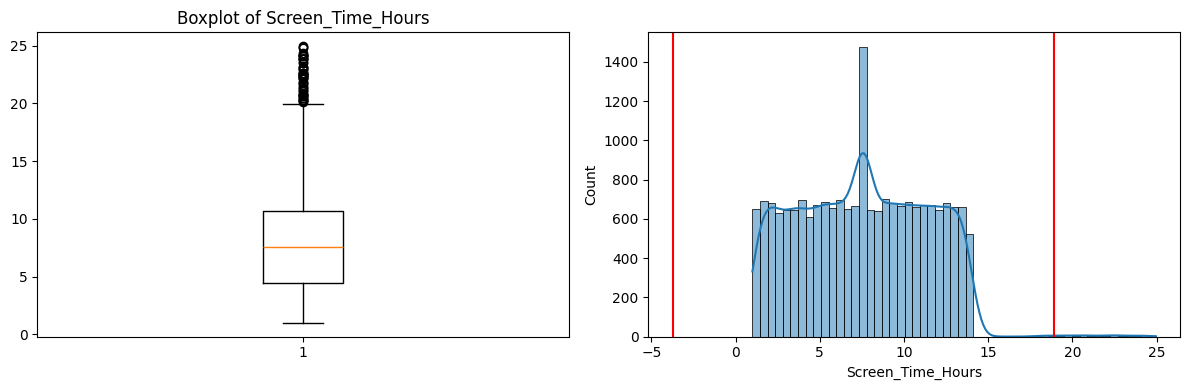

In [15]:
checkOutliers(data, 'Screen_Time_Hours')

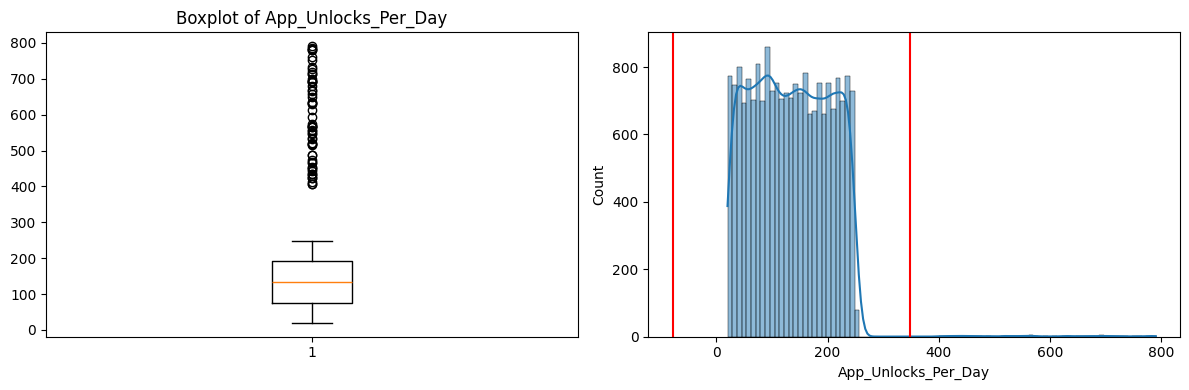

In [16]:
checkOutliers(data, 'App_Unlocks_Per_Day')

### Handle Null Values

In [17]:
def handleOuteliers(data, col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    data.loc[data[col] > upper, col] = upper
    data.loc[data[col] < lower, col] = lower

In [18]:
handleOuteliers(data, 'Screen_Time_Hours')
handleOuteliers(data, 'App_Unlocks_Per_Day')

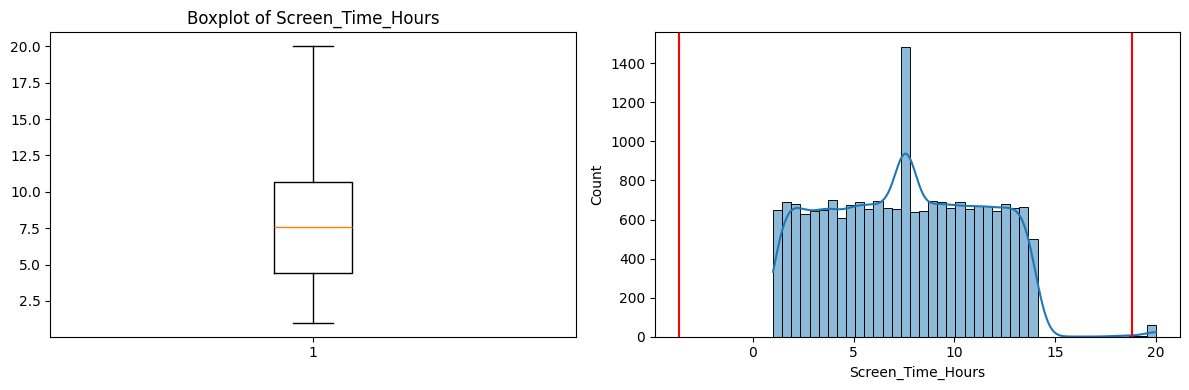

In [19]:
checkOutliers(data, 'Screen_Time_Hours')

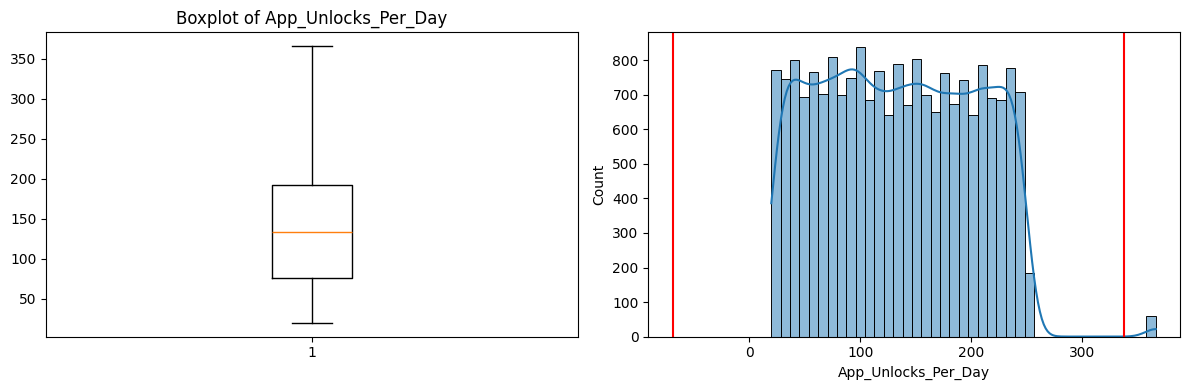

In [20]:
checkOutliers(data, 'App_Unlocks_Per_Day')

### Build Model

In [59]:
X = data.drop('Addiction_Risk', axis=1)
y = data['Addiction_Risk']

#### SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [61]:
X_sm, y_sm = sm.fit_resample(X, y)

In [62]:
print('X_sm: ', X_sm.shape)
print('X: ', X.shape)

X_sm:  (35370, 8)
X:  (19999, 8)


In [63]:
print('y_sm: ', y_sm.value_counts())
print('y: ', y.value_counts())

y_sm:  Addiction_Risk
Low       11790
Medium    11790
High      11790
Name: count, dtype: int64
y:  Addiction_Risk
Medium    11790
High       4173
Low        4036
Name: count, dtype: int64


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [68]:
## Train Prediction
train_predict = rf.predict(X_train)

In [69]:
## Testing Prediction
test_predict = rf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
## Training Accuracy
train_acc = accuracy_score(y_train, train_predict)
print('Training Accuracy: ', train_acc)

Training Accuracy:  1.0


In [72]:
## Testing Accuracy
test_acc = accuracy_score(y_test, test_predict)
print('Training Accuracy: ', test_acc)

Training Accuracy:  0.9450570163038357


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
# # Testing Accuracy
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

        High       0.95      0.96      0.95      3475
         Low       0.96      0.96      0.96      3552
      Medium       0.92      0.92      0.92      3584

    accuracy                           0.95     10611
   macro avg       0.95      0.95      0.95     10611
weighted avg       0.94      0.95      0.95     10611



In [75]:
# Training Accuracy
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      8315
         Low       1.00      1.00      1.00      8238
      Medium       1.00      1.00      1.00      8206

    accuracy                           1.00     24759
   macro avg       1.00      1.00      1.00     24759
weighted avg       1.00      1.00      1.00     24759



In [38]:
import streamlit as st
import pickle

In [ ]:
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf, file)

In [ ]:
## LOW
# Age:                   30
# Screen_Time_Hours:      3
# Social_Media_Hours:     1
# Sleep_Hours:            8
# Study_Work_Hours:       8
# Physical_Activity_Min:  120
# App_Unlocks_Per_Day:    40
# Mood_Score:             8

In [ ]:
#### MEDIUM
# Age: 23
# Screen_Time_Hours: 8
# Social_Media_Hours: 5
# Sleep_Hours: 6
# Study_Work_Hours: 5
# Physical_Activity_Min: 40
# App_Unlocks_Per_Day: 140
# Mood_Score: 4

In [ ]:
## High
# Age:                   19
# Screen_Time_Hours:     12
# Social_Media_Hours:     8
# Sleep_Hours:            4.5
# Study_Work_Hours:       3
# Physical_Activity_Min:  10
# App_Unlocks_Per_Day:   220
# Mood_Score:             2